In [1]:
%load_ext autoreload
%autoreload 2
from WST import WST
import os

In [2]:
# extract the name of the file
col_group = ['Date', 'Class', 'Stress_weight', 'Position']
file_name = '10_SG1_SVN/CARS'
path = os.path.join(os.path.abspath(os.getcwd()), file_name)
c = WST(path, MAX_COMPONENTS=10, col_group=col_group, cutoff=0.5)

Training/Testing split: 70.0% training, 30.0% testing
Training samples: 135
Testing samples: 58

Train/Test split by Class and Stress_weight:
  Class Controlled (C), Stress_weight 20: 22 train, 9 test
  Class Controlled (C), Stress_weight 40: 20 train, 9 test
  Class Controlled (C), Stress_weight 60: 22 train, 9 test
  Class Stressed Water (W), Stress_weight 20: 24 train, 10 test
  Class Stressed Water (W), Stress_weight 40: 24 train, 11 test
  Class Stressed Water (W), Stress_weight 60: 23 train, 10 test


In [3]:
c.compute_survived_wavelengths_best_score()
c.plot_survived_df

,Wavelengths,count
0,400.000,10
1,401.000,8
2,402.000,8
3,403.000,13
4,404.000,13
...,...,...
2096,2496.000,6
2097,2497.000,5
2098,2498.000,10
2099,2499.000,8


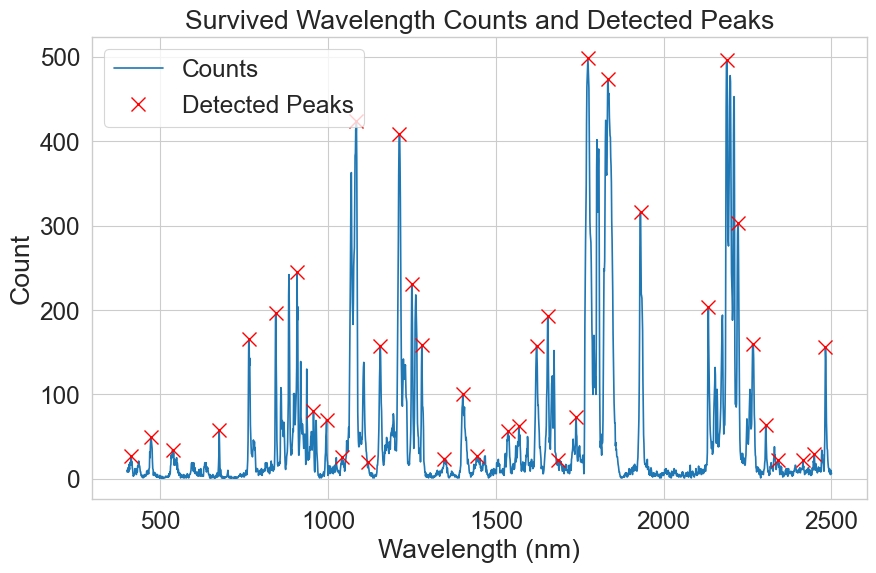

Peak-detected indices using SciPy: [1374, 1788, 1434, 684, 812, 1531, 1821, 507, 849, 1733, 444, 1255, 364, 1865, 879, 755, 1221, 2082, 1001, 556, 1339, 595, 1904, 1168, 275, 1136, 72, 136, 2049, 1044, 13, 642, 945, 1285, 1942, 2015, 719]

Total combinations to test: 1

Combination 0: ['413.000', '472.000', '536.000', '675.000', '764.000', '844.000', '907.000', '956.000', '995.000', '1042.000', '1084.000', '1119.000', '1155.000', '1212.000', '1249.000', '1279.000', '1345.000', '1401.000', '1444.000', '1536.000', '1568.000', '1621.000', '1655.000', '1685.000', '1739.000', '1774.000', '1834.000', '1931.000', '2133.000', '2188.000', '2221.000', '2265.000', '2304.000', '2342.000', '2415.000', '2449.000', '2482.000']
Number of wavelengths: 37
Accuracy: 0.78, Recall: 0.77, Precision: 0.80, Specifity: 0.78, F1: 0.79 , nLV: 8, Cutoff: 0.50

True & 37 & 0.78 & 0.77 & 0.80 & 0.79  & 8.00  & 0.50 \ \hline

Mismatched indices: [ 2  4 11 19 21 28 29 39 43 46 53 56 57]
Correct class values: ['Stress

In [4]:
a, w, y_pred = c.accuracy_survived_wavelenghts(thr=None, rdm=False, all=False, model_type='PLS', wavelengths=None, learning_curve=False, pls_plot=False, peak_detection=True, peak_distance=30, peak_height=20, confusion_matrix_f=True)

import numpy as np
import pandas as pd

# Step 1: Find indices where predictions differ from true values
diff_indices = np.where(y_pred != c.y_test.flatten())[0]

# Step 2: Get the correct class values from c.y_test
correct_classes = c.y_test[diff_indices]

# Step 3: Get the corresponding Stress_weight values from the test index
stress_weights = list(c.index_testing.get_level_values('Stress_weight')[diff_indices])

# If you want to print or return the results
print("Mismatched indices:", diff_indices)
print("Correct class values:", correct_classes)
print("Corresponding Stress_weight values:", stress_weights)

In [5]:
for i in w:
    print(len(i))
    c.permutation_test(wavelengths=i)

37
